# Version Checking

In [2]:
import sys 
import numpy as np
print("Python Version:", sys.version, '\n')
print("Numpy Version: ", np.__version__)

Python Version: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)] 

Numpy Version:  1.20.3


# Why do we like numpy?

Numpy is a great library with many, many functions that extend it well beyond normal Python. We're going to focus on some of the primary functions that we use all the time. 

Also note that Pandas is pretty much just numpy with column names (and some SQL seasoning) in a lot of ways, so anything we can do to a numpy array we can usually do with a Pandas column. A prominent exception: matrix math doesn't work well in pandas.

### Get some data (we'll just use some random data)

In [3]:
import numpy as np

In [9]:
newData = np.random.uniform

In [7]:
data = np.random.uniform(size=10000)
print(type(data))
data_as_list = data.tolist()
print(type(data_as_list))

<class 'numpy.ndarray'>
<class 'list'>


In [8]:
data.shape

(10000,)

### Broadcasting

If we want to perform a mathematical operation on a list, we have to explicitly loop through the list. If we want to act on an array, we can just treat it like a single object and the operation is "broadcast" to all of the members of the array. It's LIGHTNING fast. Let's see it in action.

In [11]:
new_data = data + 2

zip = (a,b)

In [18]:
for added, raw in zip(new_data[:10],data):
    print(added,'  ', raw)

2.943229847436217    0.943229847436217
2.745766763153614    0.7457667631536139
2.6315365994326236    0.6315365994326237
2.7360561176056963    0.7360561176056964
2.83214105155413    0.8321410515541298
2.934520401438135    0.9345204014381353
2.0464908587953348    0.046490858795334544
2.888485997431019    0.8884859974310187
2.6096419746180666    0.6096419746180667
2.8823349530910662    0.8823349530910662


What do I mean when I say "lightning fast"?

In [19]:
%%timeit
new_list = [x+2 for x in data_as_list]

1.63 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
new_data2 = data + 2

10.3 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Filtering

One of the great things about Pandas is the ability to quickly filter your data. Turns out that's because we're working with numpy arrays. Let's check out filtering on arrays - note that we're going to make a condition and each value in the array will be `True` or `False` based on whether it actually passes the condition.

In [9]:
new_data > 2.5

array([False, False, False, ...,  True, False,  True])

Once we have the filter, if we ask the array to adjust itself based on that filter, it will automatically only keep the rows that are True.

In [9]:
np.sum(new_data > 2.5)

4967

In [10]:
new_data[new_data > 2.5].shape

(4967,)

In [11]:
new_data[new_data > 2.5]

array([2.77889504, 2.69039185, 2.6746997 , ..., 2.69136552, 2.54867922,
       2.6385608 ])

We can also filter on any data source that has the same length as the data we're filtering. So for instance, if we make a condition on `data` which is equivalent to `new_data - 2`, we can still filter `new_data` the same way. That's possible because data has the same length.

In [12]:
print(new_data.shape)
print(data.shape)

(10000,)
(10000,)


In [13]:
new_data[data > 0.5]


array([2.77889504, 2.69039185, 2.6746997 , ..., 2.69136552, 2.54867922,
       2.6385608 ])

#### Exercise:

Write a function that takes in two arrays and a value. The first array is a data array, the second is a 1D array, and the value should be numeric.

We want to use broadcasting and filtering to return the rows of the first array, that correspond to indexes where the second array has a value larger than the user provided value. We also want to add 2 to the values in that row.

Example:

```
x1 = np.array([[1,2],[3,4],[5,6]])
x2 = np.array([1, 2, 3])
value = 1.5

my_function(x1, x2, value)
----
> array([[5, 6],
>        [7, 8]])
```

In [22]:
def my_function(x1,x2,value):
    x = x1[x2>value]+2
    return x

In [23]:
import numpy as np
x1 = np.array([[1,2],[3,4],[5,6]])
x2 = np.array([1, 2, 3])
value = 1.5

my_function(x1, x2, value)

array([[5, 6],
       [7, 8]])

In [16]:
print(x1.shape)
print(x2.shape)

(3, 2)
(3,)


### Reorganization

`numpy` also allows us to quick reorganize our array. Let's see a simple working example. By providing a list of "how to align the indexes" we can rearrange the data. 

In [37]:
a = np.array([10,20,30,40,50])
a=a[[1,0,2,4,3]]

In [38]:
print(a)

[20 10 30 50 40]


### Random number draws

`numpy` also has a great series of tools for generating random numbers effectively. Let's see a few in action (we'll use matplotlib to visualize.

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

def plot_hist(x, bins=None):
    plt.figure(dpi=100)
    plt.hist(x, bins=bins);

random.uniform(low=0.0, high=1.0, size=None)
Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high).

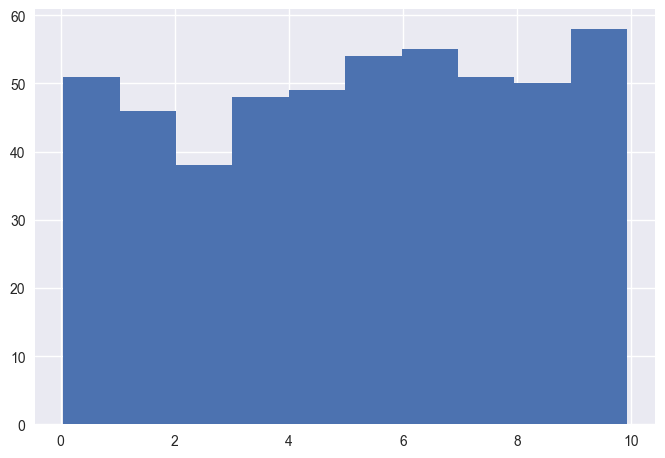

In [56]:
x = np.random.uniform(0,10,size=500)
plot_hist(x)

In [57]:
np.random.normal?

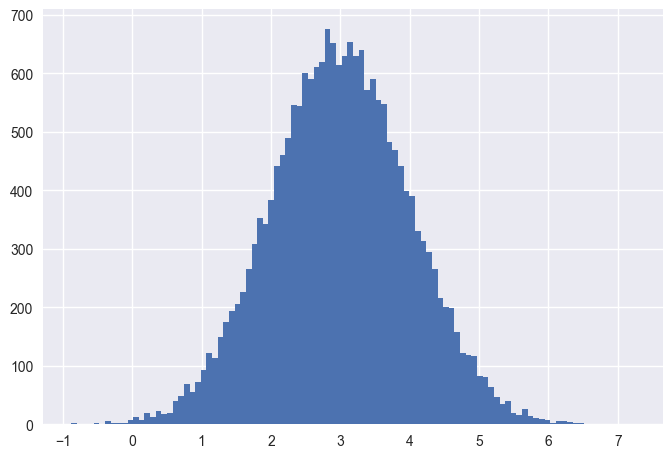

In [59]:
x = np.random.normal(3,1,size=20000) # mean 3 , standard deviation 1
plot_hist(x, bins=100)

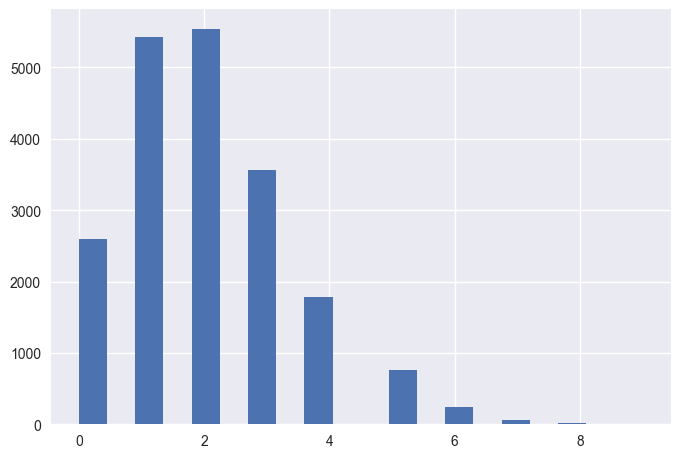

In [60]:
x = np.random.poisson(2, size=20000)     #The Poisson distribution is like the binomial distribution, but deals with a continuous rather than with a discrete situation
plot_hist(x, bins=20)

### Matrix Multiplication

Doing matrix multiplication programmatically is usually a hassel. `numpy` makes that simple. There are two methods for doing that: `numpy` treats `@` as meaning "do the matrix multiplication".

In [61]:
mat_a = np.random.uniform(size=(2,4))
mat_b = np.random.uniform(size=(4,3))

mat_a

array([[0.15105733, 0.45545437, 0.92618859, 0.98069629],
       [0.59862727, 0.52599948, 0.41615355, 0.55886514]])

In [63]:
mat_a@mat_b

array([[0.70265835, 0.81370792, 1.20137148],
       [0.9793472 , 0.92440478, 1.09162903]])

It also throws an error if the multiplication can't happen.

Try `mat_b@mat_a`

In [65]:
# mat_b@mat_a

You can also use `np.dot` to do the multiplication. However, be careful with this, as it also computes the actual dot product of vectors. It tries to be smart about how it does that, so it usually does a good job. 

In [66]:
np.dot(mat_a, mat_b)

array([[0.70265835, 0.81370792, 1.20137148],
       [0.9793472 , 0.92440478, 1.09162903]])

Vector dot product example:

In [67]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

`numpy` also knows about basic matrix stuff like transposes, etc. It also has a ton of cool linear algebra stuff under `np.linalg` but we're going to skip over that for now.

In [68]:
mat_a

array([[0.15105733, 0.45545437, 0.92618859, 0.98069629],
       [0.59862727, 0.52599948, 0.41615355, 0.55886514]])

In [69]:
mat_a.T

array([[0.15105733, 0.59862727],
       [0.45545437, 0.52599948],
       [0.92618859, 0.41615355],
       [0.98069629, 0.55886514]])

### Vectorization

And here's why `numpy` is a magical beast. We can take many common things and convert them into a "vectorized" process - meaning that we do the same thing over the whole dataset using advanced broadcasting. So for instance, let's look at adding a vector to a matrix (we're going to add this vector to each row) 

In [70]:
mat_a.T + np.array([1,2])

array([[1.15105733, 2.59862727],
       [1.45545437, 2.52599948],
       [1.92618859, 2.41615355],
       [1.98069629, 2.55886514]])

In [71]:
print((mat_a.T).shape)
print((mat_a.T))
print(mat_a.T + np.array([1,2]))

(4, 2)
[[0.15105733 0.59862727]
 [0.45545437 0.52599948]
 [0.92618859 0.41615355]
 [0.98069629 0.55886514]]
[[1.15105733 2.59862727]
 [1.45545437 2.52599948]
 [1.92618859 2.41615355]
 [1.98069629 2.55886514]]


`numpy` noticed that the column lengths matched and automatically adjusted to adding the whole vectors.

What do we think the below code will do?

In [72]:
mat_a - np.array([1,2,3,4])

array([[-0.84894267, -1.54454563, -2.07381141, -3.01930371],
       [-0.40137273, -1.47400052, -2.58384645, -3.44113486]])

In [73]:
print(mat_a)
print(mat_a - np.array([1,2,3,4]))

[[0.15105733 0.45545437 0.92618859 0.98069629]
 [0.59862727 0.52599948 0.41615355 0.55886514]]
[[-0.84894267 -1.54454563 -2.07381141 -3.01930371]
 [-0.40137273 -1.47400052 -2.58384645 -3.44113486]]


We can use that to do things like calculating the distance between a single vector and a whole table of vectors. Let's see that in action.

**Let's find the vector distance between a bunch of vectors and one vector**

In [74]:
new_vec = np.array([1,2])
all_vecs = np.random.uniform(size=(100,2))
print(new_vec.shape)
print(all_vecs.shape) 

(2,)
(100, 2)


If we were doing it for one vector:

In [75]:
x = all_vecs[0] # the first vector in all_vecs...  X[0]  x[1]
np.sqrt((new_vec[0] - x[0])**2 + (new_vec[1] - x[1])**2)

1.095659029936854

Now let's do it for all 100 vectors:

In [76]:
np.sqrt(np.sum((all_vecs - new_vec)**2, axis=1))[:10]

array([1.09565903, 1.31366195, 1.81580455, 1.74708045, 1.55945594,
       1.88307347, 1.83924131, 1.4731924 , 1.75192738, 1.23156635])

Many, many, many processes can be vectorized... and it can be a huge time saver on large datasets. Let's see the difference.

In [77]:
%%timeit
output = []
for x in all_vecs: # we will iterate over the 100 vectors in all_vecs (Not using broadcasting)
    dist = np.sqrt((new_vec[0] - x[0])**2 + (new_vec[1] - x[1])**2)
    output.append(dist)

1.73 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [78]:
%%timeit
np.sqrt(np.sum((all_vecs - new_vec)**2, axis=1))    # using broadcasting

28.5 µs ± 4.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


What about at a larger scale than 100?

In [79]:
all_vecs = np.random.uniform(size=(10000,2))

In [80]:
%%timeit
output = []
for x in all_vecs:
    dist = np.sqrt((new_vec[0] - x[0])**2 + (new_vec[1] - x[1])**2)
    output.append(dist)

167 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%%timeit
np.sqrt(np.sum((all_vecs - new_vec)**2, axis=1))

192 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [47]:
import time
list_timing = []
for num_vecs in np.linspace(10,10000,100):
    all_vecs = np.random.uniform(size=(int(num_vecs),2)).tolist()
    # To measure when we start our process
    start = time.time()
    
    # The actual process
    output = []
    for x in all_vecs:
        dist = np.sqrt((new_vec[0] - x[0])**2 + (new_vec[1] - x[1])**2) # without broadcasting
        output.append(dist)
        
    # Figure out when the process was done and 
    # keep track of how long it took
    end = time.time()
    list_timing.append((num_vecs, end - start))

In [48]:
array_timing = []
for num_vecs in np.linspace(10,10000,100):
    all_vecs = np.random.uniform(size=(int(num_vecs),2))
    # To measure when we start our process
    start = time.time()
    
    # The actual process
    output = np.sqrt(np.sum((all_vecs - new_vec)**2, axis=1)) #with broadcasting
        
    # Figure out when the process was done and 
    # keep track of how long it took
    end = time.time()
    array_timing.append((num_vecs, end - start))

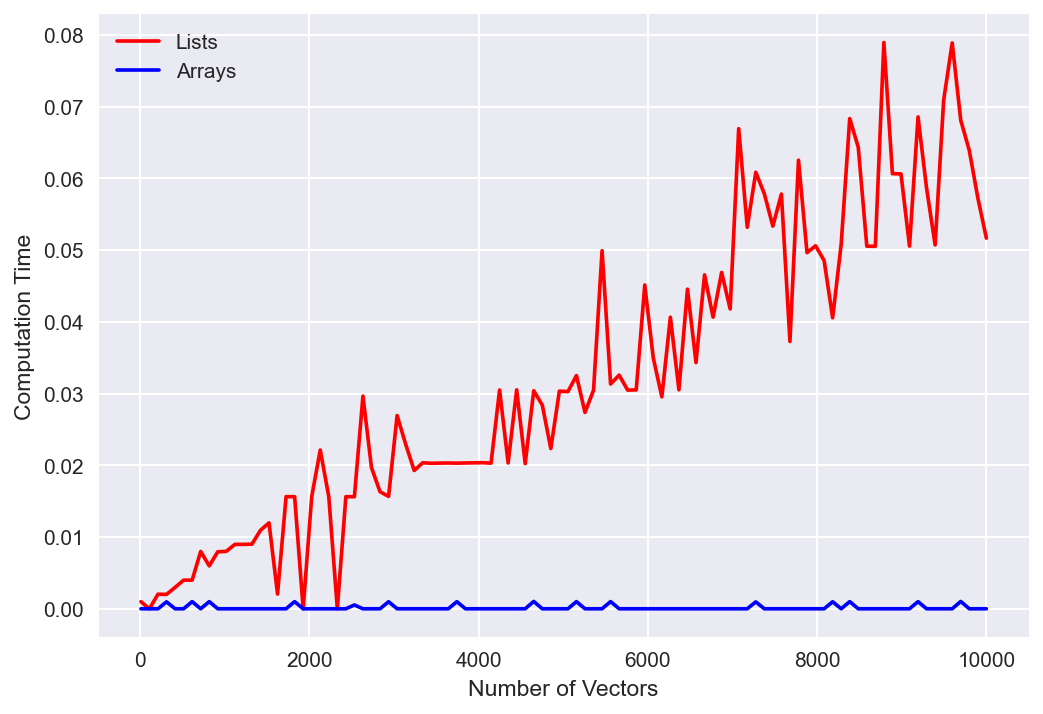

In [49]:
plt.figure(dpi=150)
list_X, list_times = zip(*list_timing)
array_X, array_times = zip(*array_timing)

plt.plot(list_X, list_times, 'r', label="Lists")
plt.plot(array_X, array_times,'b', label='Arrays')
plt.xlabel("Number of Vectors")
plt.ylabel("Computation Time")
plt.legend();

Hard to see what's happening there. Let's look on a log scale.

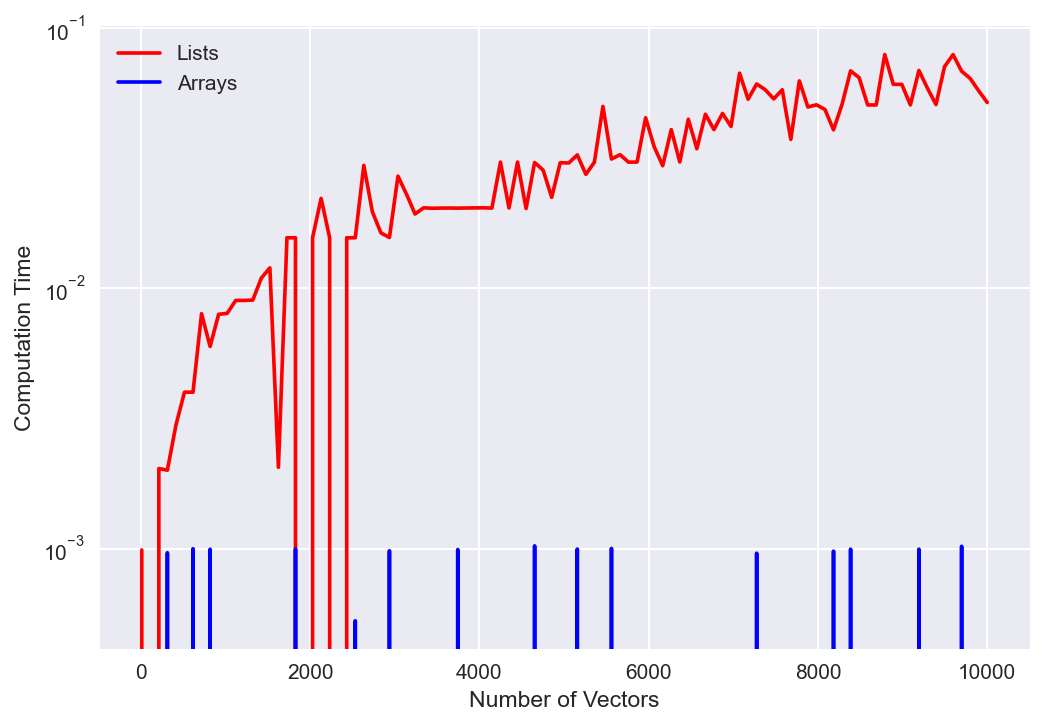

In [50]:
plt.figure(dpi=150)
list_X, list_times = zip(*list_timing)
array_X, array_times = zip(*array_timing)

plt.plot(list_X, list_times, 'r', label="Lists")
plt.plot(array_X, array_times,'b', label='Arrays')
plt.yscale('log')
plt.xlabel("Number of Vectors")
plt.ylabel("Computation Time")
plt.legend();